In [50]:
import pandas as pd
df=pd.read_csv("GSAF5.csv",encoding="ISO-8859-1")
df.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [51]:
display(df.isnull().sum())
print(df.shape)

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

(5992, 24)


In [52]:
# Debido a que las columnas Unnamed: 22 y Unnamed: 23
# tienen la mayor parte de sus datos nulos, eliminaremos las columnas
df= df[df.columns[df.isnull().sum()<5990]]
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


In [53]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [54]:
import numpy as np
#Vemos los valores de la columna Date
date=df["Date"]
date.value_counts()
#Corregiremos los datos con el fin de conseguir que todas 
#las fechas tengan el mismo formato (buscamos los meses)
#EN CASO DE FALTAR ALGUNO SE DEFINIRÁ CON UN 0

date2=df["Date"].replace('Jan','1',regex=True)
date2=date2.replace('Feb','2',regex=True)
date2=date2.replace('Mar','3',regex=True)
date2=date2.replace('Apr','4',regex=True)
date2=date2.replace('May','5',regex=True)
date2=date2.replace('Jun','6',regex=True)
date2=date2.replace('Jul','7',regex=True)
date2=date2.replace('Aug','8',regex=True)
date2=date2.replace('Sep','9',regex=True)
date2=date2.replace('Oct','10',regex=True)
date2=date2.replace('Nov','11',regex=True)
date2=date2.replace('Dec','12',regex=True)
date2=date2.replace('No date','',regex=True)
date2=date2.replace('\d\d\d\d','',regex=True)
date2=date2.replace('[a-zA-Z]','',regex=True)
date2=date2.replace('\s','',regex=True)
date2=date2.replace('\A\d\d-','',regex=True)
date2=date2.replace('-\d\d\Z','',regex=True)
date2=date2.replace('[^\d]|[^\d\d]','',regex=True)

#Definimos una función que valide que cada dato de la columna esté entre el 0 y el 12
def soloMes(*mes):
    if mes[0]=="": return 0 
    if int(mes[0])==0: return 0
    elif int(mes[0])>12: return 0
    if str(mes[0])[0]=="0" and len(str(mes[0]))==2: return int(str(mes[0])[1])
    return int(mes[0])
d=date2.apply(soloMes)
print(d.value_counts())
df["Date"]=d
df.head()


1957                    11
1942                     9
1956                     8
1941                     7
1958                     7
1950                     7
1949                     6
No date                  6
1970s                    5
1954                     5
1959                     5
1955                     5
Aug-56                   5
Oct-60                   5
12-Apr-01                5
05-Oct-03                5
No date, Before 1963     5
28-Jul-95                5
1940                     5
1960s                    4
27-Jul-52                4
1995                     4
1876                     4
14-Jun-12                4
20-Sep-15                4
1890                     4
28-Dec-14                4
23-Jan-70                4
Before 1958              4
1898                     4
                        ..
17-Mar-26                1
08-Jun-98                1
3-Jul-1879               1
Reported 19-Mar-1953     1
02-May-06                1
24-Dec-00                1
0

7     629
0     602
8     580
9     520
1     497
6     476
4     408
12    400
3     399
10    386
5     369
11    367
2     359
Name: Date, dtype: int64


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,9,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,9,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


In [55]:
df.rename(columns={"Date":"Month"},inplace=True) #Cambiamos el nombre de Date a Month
df.head()

,Case Number,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,9,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,9,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


In [56]:
years=df["Year"] #Ahora , limipiaremos la columna de Year
years.value_counts()

2015    139
2011    128
2014    125
0       124
2013    122
2008    121
2009    120
2012    117
2007    112
2006    103
2016    103
2005    103
2010    101
2000     97
1959     93
1960     93
2001     92
2004     92
2003     92
2002     88
1962     86
1961     78
1995     76
1964     66
1998     65
1999     65
1996     61
1963     61
1966     58
1997     57
       ... 
1785      1
1834      1
1791      1
1733      1
1721      1
1637      1
1617      1
77        1
5         1
1703      1
1755      1
1767      1
1771      1
1779      1
1787      1
1803      1
1749      1
1807      1
1811      1
1819      1
1805      1
1831      1
1555      1
1738      1
1859      1
1742      1
1758      1
1818      1
1822      1
1595      1
Name: Year, Length: 232, dtype: int64

In [57]:
#Cambiando los valores menores a 100 por un 0
def anyos(*x):
    if x[0]<1800: return 0
    else: return x[0]
y=years.apply(anyos)

In [58]:
y.value_counts()


0       159
2015    139
2011    128
2014    125
2013    122
2008    121
2009    120
2012    117
2007    112
2005    103
2016    103
2006    103
2010    101
2000     97
1959     93
1960     93
2003     92
2001     92
2004     92
2002     88
1962     86
1961     78
1995     76
1964     66
1999     65
1998     65
1963     61
1996     61
1966     58
1997     57
       ... 
1830      3
1826      3
1837      3
1851      3
1825      2
1828      2
1835      2
1832      2
1836      2
1869      2
1829      2
1800      1
1804      1
1812      1
1816      1
1841      1
1822      1
1850      1
1805      1
1854      1
1859      1
1818      1
1866      1
1834      1
1846      1
1803      1
1807      1
1811      1
1819      1
1831      1
Name: Year, Length: 201, dtype: int64

In [59]:
df["Year"]=y
df.head()

,Case Number,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,9,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,9,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


In [60]:
df["Type"].value_counts()

Unprovoked      4386
Provoked         557
Invalid          519
Sea Disaster     220
Boat             200
Boating          110
Name: Type, dtype: int64

In [61]:
count=df["Country"]
count.value_counts()

USA                               2116
AUSTRALIA                         1279
SOUTH AFRICA                       565
PAPUA NEW GUINEA                   133
NEW ZEALAND                        125
BRAZIL                             102
BAHAMAS                             98
MEXICO                              81
ITALY                               71
FIJI                                62
PHILIPPINES                         59
REUNION                             57
NEW CALEDONIA                       51
MOZAMBIQUE                          44
CUBA                                42
SPAIN                               40
INDIA                               37
EGYPT                               36
CROATIA                             34
JAPAN                               32
PANAMA                              32
IRAN                                29
SOLOMON ISLANDS                     29
GREECE                              25
HONG KONG                           24
JAMAICA                  

In [129]:
count=df["Country"]
count=count.replace('\A\s','',regex=True)
count=count.replace('[/?]','',regex=True)
s=pd.Series([1])

def recorrer(x):
    if x=="0":
        return "OTHERS"
    if prueba[str(x)].sum()<100: return "OTHERS"
    return x
        
prueba= count.value_counts()
prueba=prueba.to_frame()
prueba=prueba.transpose()

#x=count[(prueba["1"] == 1)] 
count[count.isnull()]="0"
count=count.apply(recorrer)

#count[count.value_counts()==1 ]
print(count.value_counts())
df["Country"]=count


USA                 2116
OTHERS              1672
AUSTRALIA           1279
SOUTH AFRICA         565
PAPUA NEW GUINEA     133
NEW ZEALAND          125
BRAZIL               102
Name: Country, dtype: int64


In [63]:
area=df["Area"]
print(area.value_counts())

def recorrerArea(*x):
    if x[0]=="0":
        return "OTHERS"
    if area_v[str(x[0])].sum()<10: return "OTHERS"
    return x[0]
        
area_v= area.value_counts()
area_v=area_v.to_frame()
area_v=area_v.transpose()


area[area.isnull()]="0"
area=area.apply(recorrerArea)
area.value_counts()



Florida                                                   990
New South Wales                                           468
Queensland                                                300
Hawaii                                                    282
California                                                276
KwaZulu-Natal                                             210
Western Cape Province                                     188
Western Australia                                         172
Eastern Cape Province                                     156
South Carolina                                            145
South Australia                                           103
North Carolina                                            100
Victoria                                                   81
Texas                                                      71
Torres Strait                                              70
Pernambuco                                                 70
North Is

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


OTHERS                   1677
Florida                   990
New South Wales           468
Queensland                300
Hawaii                    282
California                276
KwaZulu-Natal             210
Western Cape Province     188
Western Australia         172
Eastern Cape Province     156
South Carolina            145
South Australia           103
North Carolina            100
Victoria                   81
Texas                      71
Pernambuco                 70
Torres Strait              70
North Island               65
New Jersey                 49
Tasmania                   41
South Island               39
Oregon                     28
New York                   27
Northern Territory         23
Abaco Islands              22
Central Province           22
Virginia                   19
Havana Province            18
South Province             17
Puerto Rico                16
Gaza                       16
Veracruz                   15
New Ireland Province       15
Madang Pro

In [64]:
act=df["Activity"] 
act.value_counts()
def limpiarActivity(x):
    if "surfing" in str(x).lower(): return "Surfing"
    elif "swimming" in str(x).lower(): return "Swimming"
    elif "fishing" in str(x).lower(): return "Fishing"
    elif "spearfishing" in str(x).lower(): return "Spearfishing "
    elif "bathing" in str(x).lower(): return "Bathing"
    elif "wading" in str(x).lower(): return "Wading"
    elif "diving" in str(x).lower(): return "Diving"
    elif "standing" in str(x).lower(): return "Standing"
    elif "snorkeling" in str(x).lower(): return "Snorkeling"
    elif "windsurfing" in str(x).lower(): return "Windsurfing"
    elif "skiing" in str(x).lower(): return "Surf-skiing"
    elif "floating" in str(x).lower(): return "Floating"
    elif "fell overboard"in str(x).lower(): return "Fell overboard"
    else: return "Others"
act=act.apply(limpiarActivity)
df["Activity"] = act
act.value_counts()


Surfing                                                                                                                                                                            904
Swimming                                                                                                                                                                           819
Fishing                                                                                                                                                                            414
Spearfishing                                                                                                                                                                       321
Bathing                                                                                                                                                                            153
Wading                                                                               

Others            1576
Fishing           1122
Swimming          1056
Surfing           1054
Diving             509
Bathing            180
Wading             160
Standing           128
Snorkeling          82
Floating            44
Fell overboard      41
Surf-skiing         40
Name: Activity, dtype: int64

In [65]:
df.head()
df=df.drop(['Case Number','Investigator or Source','pdf','href formula','href','Case Number.1','Case Number.2'],axis=1)

,Case Number,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,9,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,9,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


In [66]:
df.head()

,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,original order
0,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,5993
1,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,5992
2,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,5991
3,9,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,5990
4,9,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,5989


In [67]:
time=df["Time"]
time=time.replace('h\d\d','',regex=True)
time=time.replace('\A0','',regex=True)
def horas2(x):
    try:
        if len(str(x))>2: 
            return int(str(x)[0:1])
        return int(x)
    except ValueError:
        return str(x)
       

def horas(x):
    try:
        if int(x)>6 & int(x)<=14: return "Morning"
        elif int(x)>14 & int(x)<=21: return "Afternoon"
        else: return "Night"
    
    except ValueError:
        if (str(x)=="P.M.") or ("afternoon" in str(x).lower()) or ("midday" in str(x).lower()): return "Afternoon"  
        if (str(x)=="A.M.") or ("morning" in str(x).lower()): return "Morning"
        if (str(x)=="Evening") or ("night" in str(x).lower()) or ("dusk" in str(x).lower()): return "Night"
        return "nan"
time=time.apply(horas2)       
time=time.apply(horas)
df["Time"]=time
time.value_counts()



nan          3271
Morning      2314
Afternoon     238
Night         169
Name: Time, dtype: int64

In [68]:
sp=df["Species "]

def sharks(x):
    if "lemon" in str(x).lower(): return "Lemon shark"
    if "mako" in str(x).lower(): return "Mako shark"
    if "small" in str(x).lower(): return "Small shark"
    if "blue" in str(x).lower(): return "Blue shark"
    if "wobbegong" in str(x).lower(): return "Wobbegong shark"
    if "no" in str(x).lower(): return "No shark"
    if "white" in str(x).lower(): return "White shark"
    if "bull" in str(x).lower(): return "Bull shark"
    if "tiger" in str(x).lower(): return "Tiger shark"
    if "blacktip" in str(x).lower(): return "Blacktip shark"
    if "shark" in str(x).lower(): return "Shark" 
    return "NULO"
    
sp=sp.apply(sharks)
df["Species "]=sp
sp.value_counts()

NULO               2989
Shark              1406
White shark         634
Tiger shark         274
Bull shark          169
No shark            151
Blacktip shark       95
Small shark          79
Blue shark           59
Mako shark           56
Wobbegong shark      45
Lemon shark          35
Name: Species , dtype: int64

In [69]:
df.head()

,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,original order
0,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,Morning,NULO,5993
1,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,Morning,NULO,5992
2,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,Morning,NULO,5991
3,9,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,nan,NULO,5990
4,9,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,nan,Shark,5989


In [70]:
mort=df["Fatal (Y/N)"]
def limpio(x):
    if str(x).upper()=="N": return "N"
    if str(x).upper()=="Y": return "Y"
    return "UNKNOWN"

mort=mort.replace('\s','',regex=True)
mort=mort.apply(limpio)
df["Fatal (Y/N)"]=mort
mort.value_counts()

N          4325
Y          1552
UNKNOWN     115
Name: Fatal (Y/N), dtype: int64

In [71]:
print(df.columns)
df=df.drop('Location',axis=1)
df.head()

Index(['Month', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'original order'],
      dtype='object')


,Month,Year,Type,Country,Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,original order
0,9,2016,Unprovoked,USA,Florida,Surfing,male,M,16,Minor injury to thigh,N,Morning,NULO,5993
1,9,2016,Unprovoked,USA,Florida,Surfing,Chucky Luciano,M,36,Lacerations to hands,N,Morning,NULO,5992
2,9,2016,Unprovoked,USA,Florida,Surfing,male,M,43,Lacerations to lower leg,N,Morning,NULO,5991
3,9,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,nan,NULO,5990
4,9,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,nan,Shark,5989


In [72]:
df=df.drop('Name',axis=1)

In [73]:
df.head()

,Month,Year,Type,Country,Area,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,original order
0,9,2016,Unprovoked,USA,Florida,Surfing,M,16,Minor injury to thigh,N,Morning,NULO,5993
1,9,2016,Unprovoked,USA,Florida,Surfing,M,36,Lacerations to hands,N,Morning,NULO,5992
2,9,2016,Unprovoked,USA,Florida,Surfing,M,43,Lacerations to lower leg,N,Morning,NULO,5991
3,9,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,M,NaN,Struck by fin on chest & leg,N,nan,NULO,5990
4,9,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,M,NaN,No injury: Knocked off board by shark,N,nan,Shark,5989


In [103]:
edad=df["Age"]
edad=edad.replace('[^\d]|[^\d\d]','',regex=True)
edad=edad.replace('\d\d\d+','',regex=True)
edad=edad.replace('\D','',regex=True)
edad=edad.replace('','Null',regex=True)

def mejorarEdad(x):
    try: return float(x)
    except ValueError: 
        if str(x).lower()=="nan":
            return "NULO"
        return "NULO"
"""  
def agrupar(x):
    try: 
        if int(x)<10: return "[0-9]"
        if int(x)>=10 and int(x)<20: return "[10-19]"
        if int(x)>=20 and int(x)<30: return "[20-29]"
        if int(x)>=30 and int(x)<40: return "[30-39]"
        if int(x)>=40 and int(x)<50: return "[40-49]"
        if int(x)>=55 and int(x)<60: return "[50-59]"
        if int(x)>=60 and int(x)<70: return "[60-69]"
        if int(x)>=70 and int(x)<80: return "[70-79]"
        if int(x)>=80 and int(x)<90: return "[80-89]"
        if int(x)>=90: return "[90+]"
    except ValueError:
        return "NULO"
"""
edad.fillna("NULO")
edad=edad.apply(mejorarEdad)
#edad=edad.apply(agrupar)
df["Age"]=edad
edad.value_counts()


'  \ndef agrupar(x):\n    try: \n        if int(x)<10: return "[0-9]"\n        if int(x)>=10 and int(x)<20: return "[10-19]"\n        if int(x)>=20 and int(x)<30: return "[20-29]"\n        if int(x)>=30 and int(x)<40: return "[30-39]"\n        if int(x)>=40 and int(x)<50: return "[40-49]"\n        if int(x)>=55 and int(x)<60: return "[50-59]"\n        if int(x)>=60 and int(x)<70: return "[60-69]"\n        if int(x)>=70 and int(x)<80: return "[70-79]"\n        if int(x)>=80 and int(x)<90: return "[80-89]"\n        if int(x)>=90: return "[90+]"\n    except ValueError:\n        return "NULO"\n'

0         16
1         36
2         43
3       Null
4       Null
5       Null
6         60
7         51
8         50
9         12
10      Null
11         9
12        22
13        25
14        37
15        20
16        49
17        15
18        21
19        22
20        40
21        72
22      Null
23        43
24        18
25        29
26        36
27      Null
28        31
29      Null
        ... 
5962    Null
5963    Null
5964    Null
5965    Null
5966      16
5967    Null
5968    Null
5969    Null
5970    Null
5971    Null
5972    Null
5973    Null
5974    Null
5975    Null
5976    Null
5977    Null
5978    Null
5979    Null
5980    Null
5981    Null
5982    Null
5983    Null
5984    Null
5985    Null
5986    Null
5987    Null
5988    Null
5989    Null
5990    Null
5991      15
Name: Age, Length: 5992, dtype: object

NULO    2747
17.0     148
18.0     146
20.0     144
19.0     139
15.0     135
16.0     134
21.0     116
22.0     113
24.0     103
25.0     101
14.0      98
13.0      91
30.0      82
23.0      81
26.0      80
27.0      78
28.0      77
29.0      75
12.0      70
32.0      64
35.0      64
40.0      52
10.0      51
31.0      50
38.0      47
34.0      45
43.0      43
33.0      41
36.0      41
        ... 
54.0      14
53.0      13
58.0      12
61.0      11
59.0      11
63.0       9
56.0       9
62.0       8
69.0       8
5.0        7
68.0       6
70.0       6
78.0       4
3.0        4
65.0       4
64.0       4
77.0       3
71.0       3
66.0       3
74.0       2
75.0       2
1.0        2
73.0       1
72.0       1
81.0       1
84.0       1
86.0       1
67.0       1
87.0       1
2.0        1
Name: Age, Length: 81, dtype: int64

In [75]:
df=df.drop('Injury',axis=1)

In [76]:
df.head()

,Month,Year,Type,Country,Area,Activity,Sex,Age,Fatal (Y/N),Time,Species,original order
0,9,2016,Unprovoked,USA,Florida,Surfing,M,16,N,Morning,NULO,5993
1,9,2016,Unprovoked,USA,Florida,Surfing,M,36,N,Morning,NULO,5992
2,9,2016,Unprovoked,USA,Florida,Surfing,M,43,N,Morning,NULO,5991
3,9,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,M,NULO,N,nan,NULO,5990
4,9,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,M,NULO,N,nan,Shark,5989


In [77]:
typec=df["Type"]
def func(x):
    if str(x).lower()=="nan": return "NULO"
    if "provoked" in str(x).lower(): return "Provoked"
    return "Unprovoked"

typec=typec.apply(func)
df["Type"]=typec
typec.value_counts()

Provoked      4943
Unprovoked    1049
Name: Type, dtype: int64

In [188]:
df=df.drop("original order",axis=1)
df["Sex "].value_counts()
s = df["Sex "]
def limpio(x):
    if "M" in str(x).upper(): return str("M")
    elif "F" in str(x).upper(): return str("F")
    return str("NULO")
s=s.apply(limpio)
s.value_counts()
df["Sex "]=s
#df["Sex "].value_counts()

M       4837
F        585
NULO     570
Name: Sex , dtype: int64

M       4837
F        585
NULO     570
Name: Sex , dtype: int64

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Sex 
F    26.580336
M    27.271132
Name: Age, dtype: float64

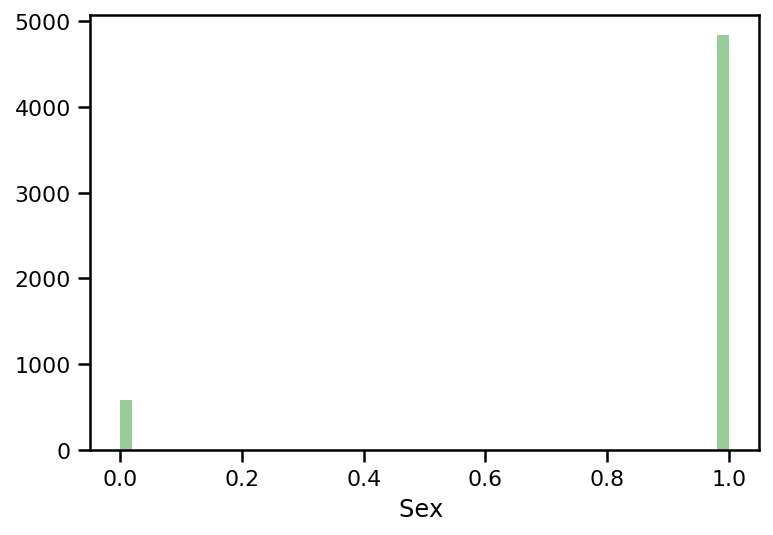

In [232]:
#Una vez limpiado los datos pasaremos al análisis de cada columna
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def numerico(x):
    if str(x)=="F" : return 0
    elif str(x)=="M": return 1

s3=df[(df["Sex "]!="NULO")]   
s3["Sex "]=s3["Sex "].apply(numerico)

#Pasamos el genero a valores numéricos para hacer el histogrma
%matplotlib inline
sns.distplot(a=s3["Sex "],hist=True, kde=False,color="green")
#función distplot: a=datos que queremos mostrar
#hist=True -> histograma
#kde=False -> No haya una estimación gaussiana

#Cogemos los datos de género y edad no nulos
s2=df[(df["Sex "]!="NULO") & (df["Age"]!="NULO")]
#Pasamos la edad a tipo float para poder calcular su media
s2["Age"]=s2["Age"].astype(str).astype(float)
#Agrupamos por género y obtenemos la media de la edad
s2=s2[["Sex ","Age"]].groupby(["Sex "]).mean()["Age"]
#Observamos la media de la edad de victimas según el género
display(s2.head())



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


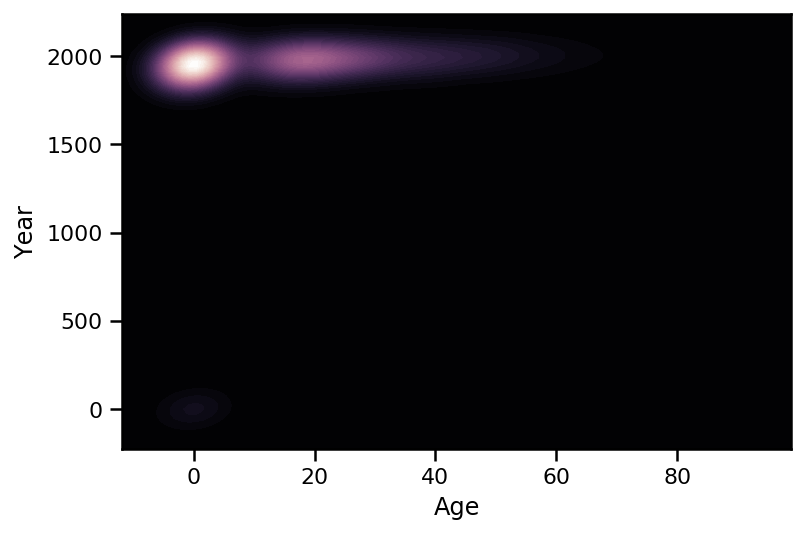

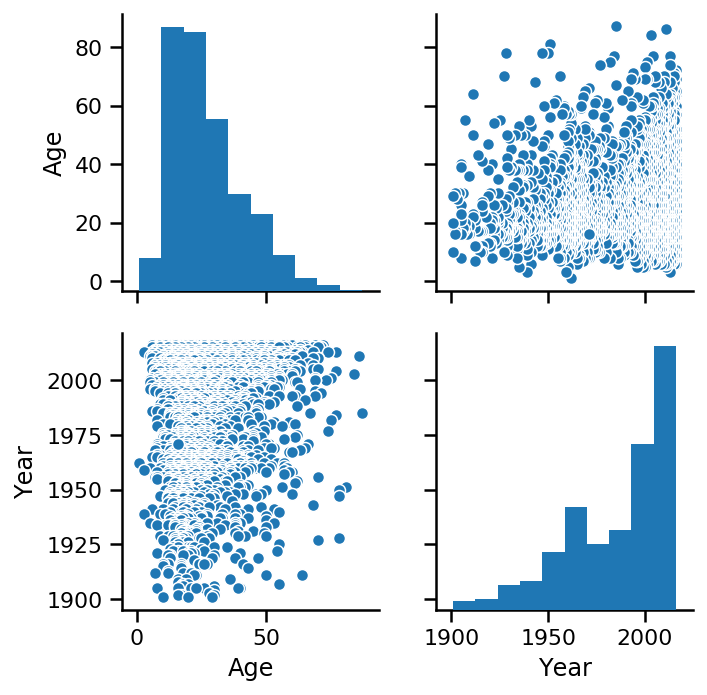

In [252]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
#sns.cubehelix_palette crea un mapa de color que decrece o incrementa el brillo
#as_cmap es booleano y si es True devuelve un colormap en vez de una lista
#de colores
#dark es el valor de la intensidad de oscuridad en la paleta
#reverse=True -> de más oscuro a más claro
def nuloA0(x):
    if "NULO" in str(x): return 0
    return x

y=df[["Age","Year"]]
y["Age"]=y["Age"].apply(nuloA0)
y["Age"]=y["Age"].astype(str).astype(float)
sns.kdeplot(y.Age, y.Year, cmap=cmap, n_levels=60, shade=True);
#kdeplot() recibe como primer parámetro un dato (La Edad)
#como segundo parámetro el siguiente dato a relacionar
#cmap añadimos el color. 
#shade = True -> contornos de los circulos rellenos

#Cogemos los valores válidos de los meses y años(no nulos)
data=df[(y["Age"]>0) & (y["Year"]>1900)][["Age","Year"]]
#Obtenemos la relacion entre ambos con la función pairplot
sns.pairplot(data)
#Observamos que no existe ninguna relación de ataques de tiburones
#entre los meses y los años
#Observamos que durante el paso de los años ha aumentado la cantidad 
#de victimas

Country
AUSTRALIA       27.519403
BRAZIL          22.824561
NEW ZEALAND     27.604167
SOUTH AFRICA    25.504249
USA             26.632509
Name: Age, dtype: float64

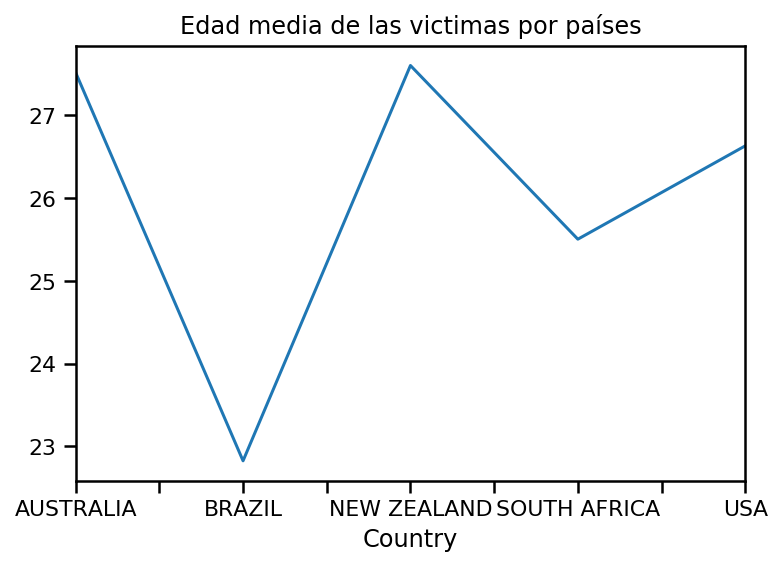

In [236]:
prueba2=df[["Age","Country"]]
#Nos enfocamos en la edad de las personas y los países en los que han ocurrido
prueba2=prueba2[(prueba2["Age"]!="NULO") & (prueba2["Country"]!="OTHERS") & (prueba2["Country"]!="PAPUA NEW GUINEA")]
prueba2["Age"]= prueba2["Age"].astype(str).astype(float)
#Obtenemos la media de las edades de las victimas por país 
m=prueba2.groupby(["Country"]).mean()["Age"]
display(m.head())
%matplotlib inline
m.plot(title="Edad media de las victimas por países")

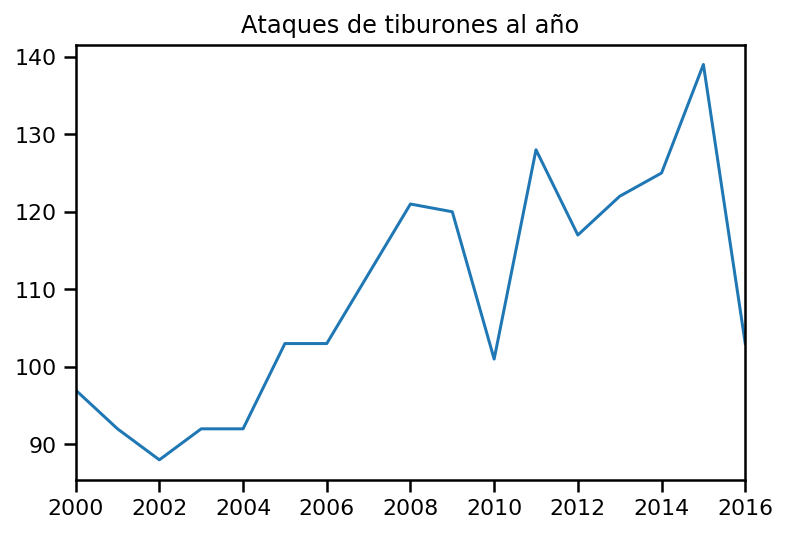

In [238]:
#sort_index()-> ordena los años por etiquetas a lo largo de un eje dado
yearv=df[df["Year"]>=2000]["Year"].value_counts().sort_index()
%matplotlib inline
yearv.plot(title="Ataques de tiburones al año")





Year
2000    31.367647
2001    27.212121
2002    28.473684
2003    27.681159
2004    29.349206
Name: Age, dtype: float64

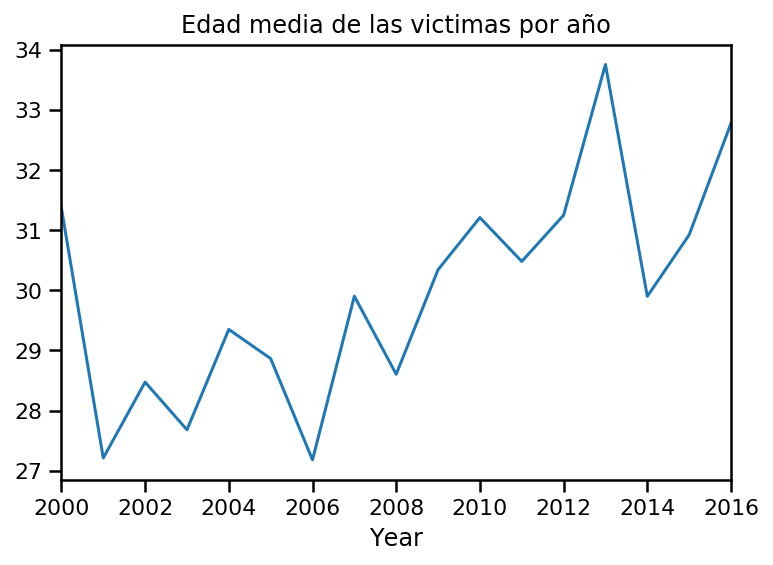

In [240]:
#Ahora analizaremos la edad media de las victimas desde el año 2000
prueba3=df[["Age","Year"]]
#Nos quitamos los valores nulos
prueba3=prueba3[(prueba3["Age"]!="NULO") & (prueba3["Year"]>=2000)]
prueba3["Age"]= prueba3["Age"].astype(str).astype(float)
#Agrupamos por año y obtenemos la media de la edad en cada año
m2=prueba3.groupby(["Year"]).mean()["Age"]
display(m2.head())
%matplotlib inline
m2.plot(title="Edad media de las victimas por año")

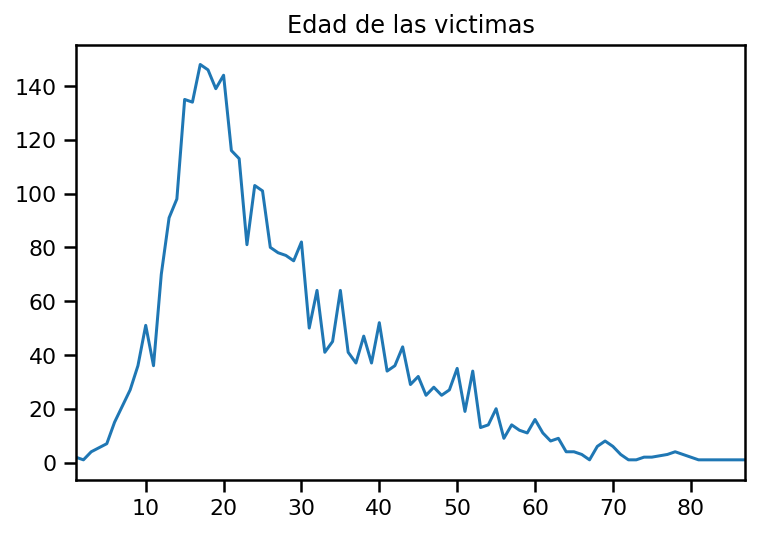

In [180]:
#Estudiamos la cantidad de personas atacadas según la edad
edadv=df[df["Age"]!="NULO"]["Age"].value_counts().sort_index()
%matplotlib inline
edadv.plot(title="Edad de las victimas")




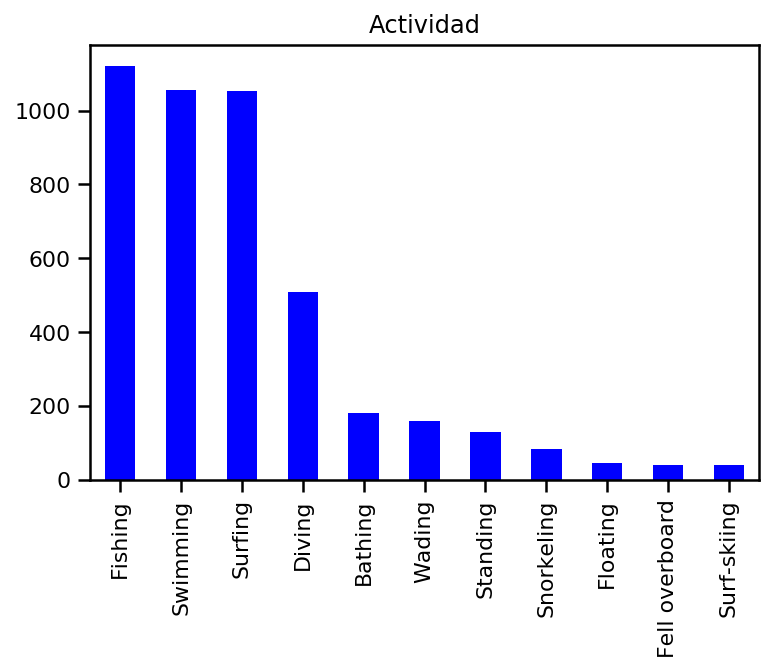

In [189]:
act=df[df["Activity"]!="Others"]["Activity"].value_counts()
#Buscamos la cantidad de victimas según la actividad del momento del ataque
act.plot.bar(color="blue", title="Actividad")

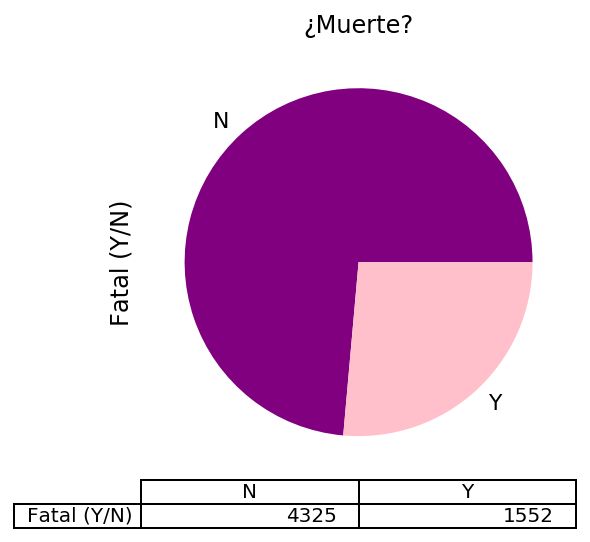

In [196]:
#¿Cuántos ataques han sido mortales?
muerte = df[df["Fatal (Y/N)"]!="UNKNOWN"]["Fatal (Y/N)"].value_counts()
muerte.plot(kind="pie", title="¿Muerte?", colors=["purple","pink"],table=True)

Month  Sex 
0      0       472
       1        45
1      0       400
       1        33
2      0       291
dtype: int64
Sex      0   1
Month         
0      472  45
1      400  33
2      291  24
3      328  32
4      351  30


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


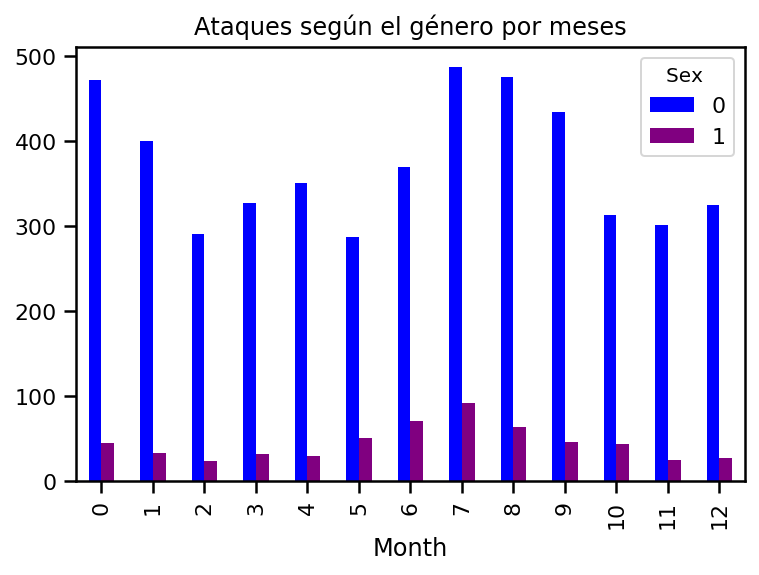

In [247]:
def genero0_1(x):
    if "M" in str(x): return 0
    elif "F" in str(x): return 1
#Pasamos el género a numérico 
hor_g=df[df["Sex "]!="NULO"]
hor_g["Sex "]=hor_g["Sex "].apply(genero0_1)
#Agrupamos los datos por mes y género y sacamos el tamaño de cada grupo
#.to_frame() -> lo creamos para pasarlo a un dataframe
hor_g2=hor_g.groupby(["Month","Sex "]).size()
print(hor_g2.head())
hor_g2=hor_g2.to_frame().unstack(level="Sex ")[0]
#unstack nos agrupa el sexo como columna y los meses en las filas
#Se muestra la forma de los dos para poder comparar el efecto del unstack
#el [0] del final es importante ya que si no nos salen los datos del género
#como si fuesen una tupla
print(hor_g2.head())
hor_g2.plot.bar(title="Ataques según el género por meses",color=["blue","purple"])